# 14

In [53]:
records = [] 

with open("input.txt") as f:
    for line in f:
        line = line.strip().split(' ')

        p_entry = line[0]
        v_entry = line[1]

        p_entry = p_entry.split('=')[1].split(',')
        p_entry = (int(p_entry[0]), int(p_entry[1]))

        v_entry = v_entry.split('=')[1].split(',')
        v_entry = (int(v_entry[0]), int(v_entry[1]))
        
        records.append({"p": p_entry, "v":v_entry})

# Size of the grid
W = 101
H = 103

Make deepcopy se I don't need to reload

In [54]:
from copy import deepcopy

positions = deepcopy(records)

# Do the 100 iterations
for _ in range(100):
    for position in positions: 
        x = (position["p"][0] + position["v"][0]) % W
        y = (position["p"][1] + position["v"][1]) % H

        position["p"] = (x, y)


In [55]:
def count_robots_in_quadrants(positions):
    quadrant_count  = [0,0,0,0]
    for position in positions:
        x, y = position["p"]
        if x < W//2 and y < H//2:
            quadrant_count[0] += 1
        elif x > W//2 and y < H//2:
            quadrant_count[1] += 1
        elif x < W//2 and y > H//2:
            quadrant_count[2] += 1
        elif x > W//2 and y > H//2:
            quadrant_count[3] += 1

    return quadrant_count

counts = count_robots_in_quadrants(positions)

In [56]:
result = counts[0]*counts[1]*counts[2]*counts[3]
result

221616000

In [57]:
def print_positions(positions):
    for y in range(H):
        for x in range(W):
            if (x, y) in [p["p"] for p in positions]:
                print(str([p["p"] for p in positions].count((x,y))), end="")
            else:
                print(".", end="")
        print()
    print()

print_positions(positions)

.............1...............................1......................1.........1......1...............
1........................................................................1..........................1
....1......1.......................................................1.................................
...................1........................................1...................1....................
.............1.1...................1......1.........1......................1.........................
..1........................1...............1.......................1.......1.........................
..............................1......................1.............1............................1....
...............................1.................1...............................1..........1........
...1...................1..1..........................1.......1...........................1...........
.1...........................1............1.......................................

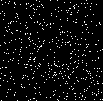

In [58]:
from PIL import Image
import numpy as np

def draw_positions(positions):
    array = np.zeros((W, H, 3), dtype=np.uint8)
    for y in range(H):
        for x in range(W):
            if (x, y) in [p["p"] for p in positions]:
                array[x, y] = [255, 255, 255]
            else:
                array[x, y] = [0, 0, 0]
    img = Image.fromarray(array)
    return img 

draw_positions(positions)

In [ ]:
for k in range(399, 1000):
    for position in positions: 
        x = (position["p"][0] + position["v"][0]) % W
        y = (position["p"][1] + position["v"][1]) % H

        position["p"] = (x, y)

    img = draw_positions(positions)  
    img.save(f"frames/frame_{k:03d}.png") 

In [ ]:
# Now we can use ffmpeg to create a video
# ffmpeg -r 10 -i frame_%03d.png -vcodec mpeg4 -y movie.mp4 


# 98, 199, 300, 401, 502, 603, 704, 805, 1007, 10501: (+101) H 
# 53, 156, 259,  568... 2113 4173 10353 (+103) W 

# For whatever reason



In [114]:
98 + 101*21.5

# Wrap around twice? 


2269.5

In [111]:
53+103*100

# 2229.5 

10353

In [ ]:
N = len(records)

positions = deepcopy(records)

interesting = []

for iteration in range(10000):
    for position in positions: 
        x = (position["p"][0] + position["v"][0]) % W
        y = (position["p"][1] + position["v"][1]) % H

        position["p"] = (x, y)

    # Detects the number of robots in each quadrant
    count = count_robots_in_quadrants(positions)

    for k in range(4):
        if count[k] < N/6: 
            print(iteration)
            interesting.append([iteration])
            img = draw_positions(positions)  
            img.save(f"interesting_frames/frame_{iteration:03d}.png") 
                



52
52
155
155
258
258
361
361
464
464
567
567
670
670
773
773
876
876
979
979
1082
1082
1185
1185
1288
1288
1391
1391
1494
1494
1597
1597
1700
1700
1803
1803
1906
1906
1916
2009
2009
2112
2112
2215
2215
2318
2318
2421
2421
2524
2524
2627
2627
2730
2730
2833
2833
2936
2936
3039
3039
3142
3142
3245
3245
3348
3348
3451
3451
3554
3554
3657
3657
3760
3760
3863
3863
3966
3966
4069
4069
4172
4172
4275
4275
4378
4378
4481
4481
4584
4584
4687
4687
4790
4790
4893
4893
4996
4996
5099
5099
5202
5202
5305
5305
5408
5408
5511
5511
5614
5614
5717
5717
5820
5820
5923
5923
6026
6026
6129
6129
6232
6232
6335
6335
6438
6438
6541
6541
6644
6644
6747
6747
6850
6850
6953
6953
7056
7056
7159
7159
7262
7262
7365
7365
7468
7468
7571
7571
7674
7674
7777
7777
7880
7880
7983
7983
8086
8086
8189
8189
8292
8292
8395
8395
8498
8498
8601
8601
8704
8704
8807
8807
8910
8910
8985
9013
9013
9116
9116
9219
9219
9322
9322
9425
9425
9528
9528
9631
9631
9734
9734
9837
9837
9940
9940


In [128]:
for k, positions in interesting:
    for position in positions: 
            x = (position["p"][0] + position["v"][0]) % W
            y = (position["p"][1] + position["v"][1]) % H

            position["p"] = (x, y)

    img = draw_positions(positions)  
    img.save(f"interesting_frames/frame_{k:03d}.png") 